In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [89]:
dx = pd.read_csv('linearX.csv')
dy = pd.read_csv('linearY.csv')

In [91]:
dx.head()

,9.1
0,8.0
1,9.1
2,8.4
3,6.9
4,7.7


In [93]:
dy.head()

,0.99523
0,0.99007
1,0.99769
2,0.99386
3,0.99508
4,0.99630


In [95]:
dx['0.99523']=dy['0.99523']
dx.head()

,9.1,0.99523
0,8.0,0.99007
1,9.1,0.99769
2,8.4,0.99386
3,6.9,0.99508
4,7.7,0.99630


In [97]:
def MinMaxScale(column):
    Xmin=column.min()
    Xmax=column.max()
    return (column-Xmin)/(Xmax-Xmin)

dx['9.1']=MinMaxScale(dx['9.1'])
dx['0.99523']=MinMaxScale(dx['0.99523'])
dx.rename(columns={'9.1':'col1','0.99523':'col2'},inplace=True)

In [99]:
# mm = MinMaxScaler()
# scaled_data=mm.fit_transform(dx)  
# df=pd.DataFrame(scaled_data,columns=['col1','col2'])
# df.to_csv("scaled_data.csv", index=False)
# print(df.head())

In [101]:
x=dx.drop('col2',axis=1)
y=dx['col2']

In [103]:
x_train,x_test,y_train,y_test=train_test_split=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(79, 1) (20, 1) (79,) (20,)


In [105]:
class GDs:
    def __init__(self, lr, ep):
        self.m = 0
        self.c = 1
        self.lr = lr
        self.ep = ep
        self.cost_history = []
    def fit(self, x_train, y_train):
        x_train = np.array(x_train).flatten()
        y_train = np.array(y_train)
        for i in range(self.ep):
            y_pred=self.m * x_train + self.c
            sl=(-2/len(x_train))*np.sum(y_train-y_pred)
            slm=(-2/len(x_train))*np.sum((y_train-y_pred)*x_train)
            self.c=self.c-(self.lr*sl)
            self.m=self.m-(self.lr*slm)
            cost=(1/len(x_train))*np.sum((y_train-y_pred) ** 2)
            self.cost_history.append(cost)
        print("Intercept-->:",self.c,"Slope--->:",self.m)
    def predict(self,x_test):
        x_test=np.array(x_test).flatten()
        return self.m*x_test+self.c


In [107]:
gd=GDs(lr=0.05,ep=1000)
gd.fit(x_train,y_train)

Intercept-->: 0.35958763376575403 Slope--->: 0.5340311098499848


In [109]:
y_pred=gd.predict(x_test)
print(y_pred)

[0.44859282 0.59518959 0.61089639 0.62136759 0.45906402 0.52189121
 0.46953522 0.44335722 0.67895918 0.49571321 0.40147243 0.44335722
 0.5585404  0.69990158 0.63707439 0.48000641 0.35958763 0.60042519
 0.5323624  0.41194362]


In [111]:
gd.cost_history[-1]

0.010302170669380818

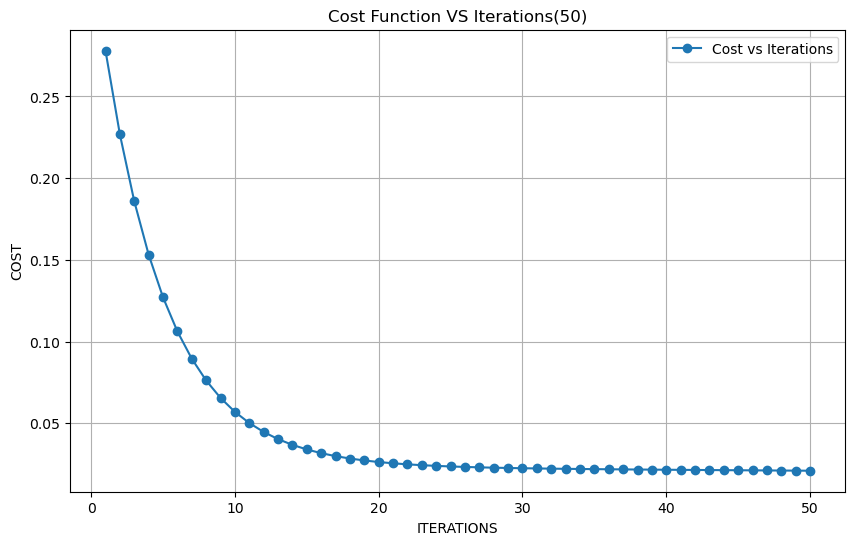

In [113]:
plt.figure(figsize=(10,6))
plt.plot(range(1,51),gd.cost_history[:50],marker='o',label='Cost vs Iterations')
plt.title("Cost Function VS Iterations(50)")
plt.xlabel("ITERATIONS")
plt.ylabel("COST")
plt.legend()
plt.grid()
plt.show()

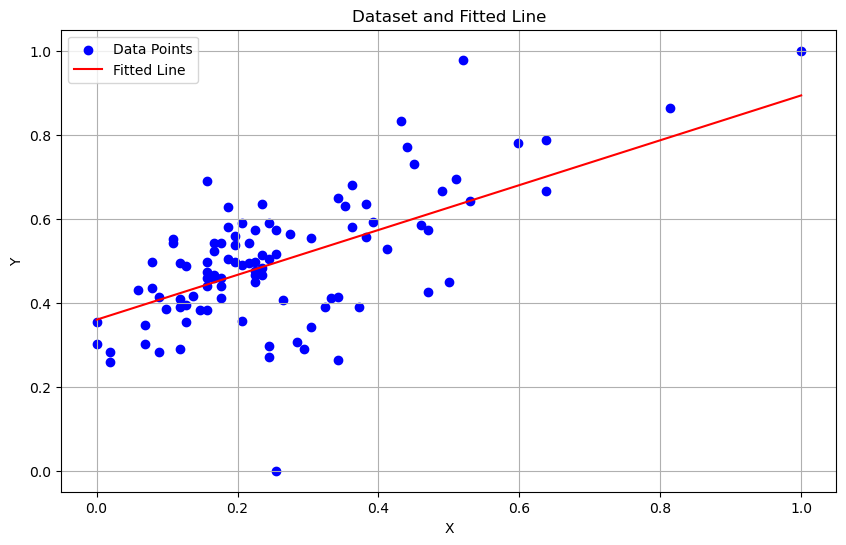

In [114]:
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='blue',label='Data Points')
x_l=np.linspace(x.min().values[0],x.max().values[0],100)
y_l=gd.m*x_l+gd.c
plt.plot(x_l,y_l,color='red',label='Fitted Line')
plt.title("Dataset and Fitted Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

Intercept-->: 0.8015755502613956 Slope--->: -0.0408920676531105
Intercept-->: 0.39494590035485927 Slope--->: 0.3951610173946835
Intercept-->: 7.253313538032457e+48 Slope--->: 1.8467950096214363e+48


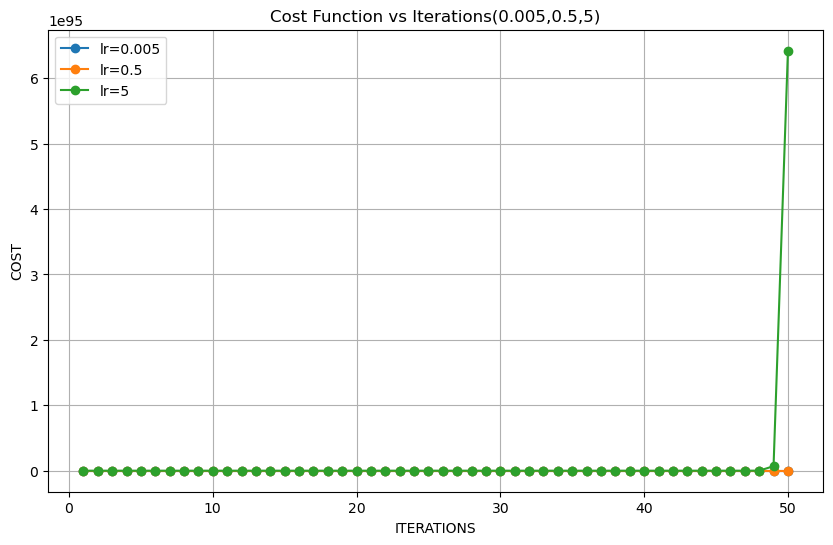

In [122]:
lrs=[0.005,0.5,5]
results={}
for lr in lrs:
    gd_temp=GDs(lr=lr, ep=50)
    gd_temp.fit(x_train,y_train)
    results[lr]=gd_temp.cost_history
plt.figure(figsize=(10,6))
for lr,cost_history in results.items():
    plt.plot(range(1,51),cost_history,marker='o',label=f"lr={lr}")
plt.title("Cost Function vs Iterations(0.005,0.5,5)")
plt.xlabel("ITERATIONS")
plt.ylabel("COST")
plt.legend()
plt.grid()
plt.show()


In [124]:
class MiniGD(GDs):
    def fit(self,x_train,y_train,bs=10):
        x_train=np.array(x_train).flatten()
        y_train=np.array(y_train)
        n=len(x_train)
        for i in range(self.ep):
            for j in range(0,n,bs):
                x_batch=x_train[j:j+bs]
                y_batch=y_train[j:j+bs]
                y_pred=self.m*x_batch+self.c
                gm=(-2/len(x_batch))*np.sum((y_batch-y_pred)*x_batch)
                gc=(-2/len(x_batch))*np.sum(y_batch-y_pred)
                self.m-=self.lr*gm
                self.c-=self.lr*gc
            cost=(1/n)*np.sum((y_train-(self.m*x_train+self.c))**2)
            self.cost_history.append(cost)

In [126]:
mgd=MiniGD(lr=0.5,ep=50)
mgd.fit(x_train,y_train,bs=10)

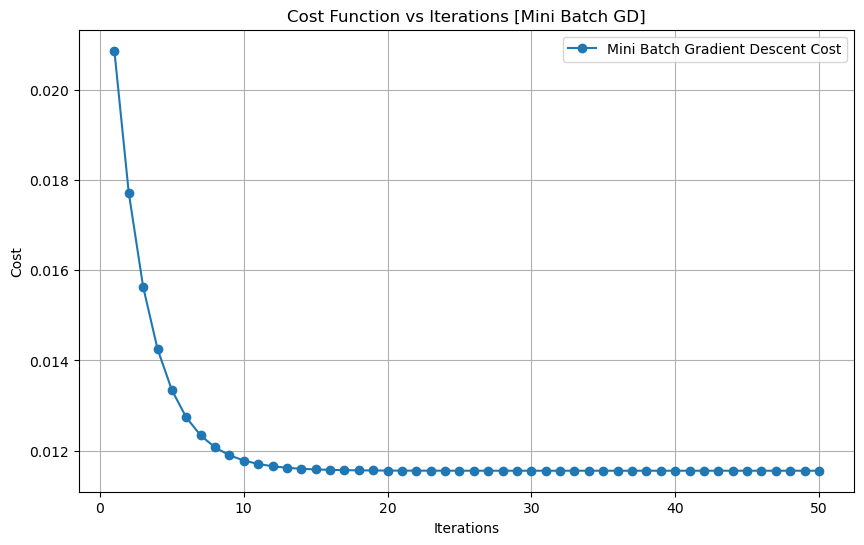

In [128]:
plt.figure(figsize=(10,6))
plt.plot(range(1,51),mgd.cost_history[:50],marker='o',label='Mini Batch Gradient Descent Cost')
plt.title("Cost Function vs Iterations [Mini Batch GD]")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()
plt.show()

In [129]:
class StochasticGD(GDs):
    def fit(self, x_train, y_train):
        x_train=np.array(x_train).flatten()
        y_train=np.array(y_train)
        n = len(x_train)
        for i in range(self.ep):
            for j in range(n):
                x_s=x_train[j]
                y_s=y_train[j]
                y_pred=self.m*x_s+self.c
                gms=-2*(y_s-y_pred)*x_s
                gcs=-2*(y_s-y_pred)
                self.m -= self.lr * gms
                self.c -= self.lr * gcs
            cost=(1/n)*np.sum((y_train-(self.m*x_train+self.c))** 2)
            self.cost_history.append(cost)

In [132]:
gds1=StochasticGD(lr=0.5, ep=50)
gds1.fit(x_train, y_train)

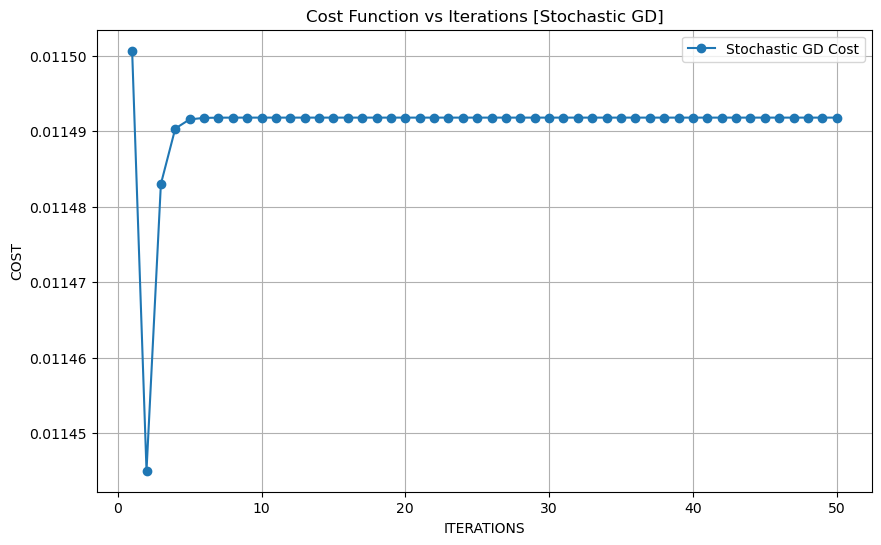

In [137]:
plt.figure(figsize=(10,6))
plt.plot(range(1,51),gds1.cost_history[:50],marker='o',label='Stochastic GD Cost')
plt.title("Cost Function vs Iterations [Stochastic GD]")
plt.xlabel("ITERATIONS")
plt.ylabel("COST")
plt.legend()
plt.grid()
plt.show()